In [8]:
# Install required libraries
!pip install pandas numpy matplotlib seaborn statsmodels yfinance pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 35.7 MB/s eta 0:00:00


In [1]:
# Import libraries
import pandas as pd
import numpy as np

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d sudalairajkumar/cryptocurrencypricehistory

Dataset URL: https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory
License(s): CC0-1.0


In [4]:
!unzip cryptocurrencypricehistory.zip

Archive:  cryptocurrencypricehistory.zip
  inflating: coin_Aave.csv           
  inflating: coin_BinanceCoin.csv    
  inflating: coin_Bitcoin.csv        
  inflating: coin_Cardano.csv        
  inflating: coin_ChainLink.csv      
  inflating: coin_Cosmos.csv         
  inflating: coin_CryptocomCoin.csv  
  inflating: coin_Dogecoin.csv       
  inflating: coin_EOS.csv            
  inflating: coin_Ethereum.csv       
  inflating: coin_Iota.csv           
  inflating: coin_Litecoin.csv       
  inflating: coin_Monero.csv         
  inflating: coin_NEM.csv            
  inflating: coin_Polkadot.csv       
  inflating: coin_Solana.csv         
  inflating: coin_Stellar.csv        
  inflating: coin_Tether.csv         
  inflating: coin_Tron.csv           
  inflating: coin_USDCoin.csv        
  inflating: coin_Uniswap.csv        
  inflating: coin_WrappedBitcoin.csv  
  inflating: coin_XRP.csv            


In [6]:
df=pd.read_csv("coin_Ethereum.csv")

In [7]:
df.sample(5)

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
1295,1296,Ethereum,ETH,2019-02-23 23:59:59,159.125870,147.331060,148.676622,158.795430,4.519468e+09,1.667063e+10
752,753,Ethereum,ETH,2017-08-29 23:59:59,373.763000,347.790009,347.964996,370.666992,1.220030e+09,3.496106e+10
1917,1918,Ethereum,ETH,2020-11-06 23:59:59,456.200618,412.982301,414.066712,454.719290,1.673831e+10,5.152864e+10
141,142,Ethereum,ETH,2015-12-27 23:59:59,0.861538,0.841151,0.853166,0.856365,1.645650e+05,6.491392e+07
626,627,Ethereum,ETH,2017-04-25 23:59:59,50.303600,49.806900,50.074600,49.891201,3.826460e+07,4.542709e+09


In [9]:
# Convert date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set date as index
df.set_index('Date', inplace=True)

# Sort by date
df = df.sort_index()

# View structure
df.head()

,SNo,Name,Symbol,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,,,,
2015-08-08 23:59:59,1,Ethereum,ETH,2.798810,0.714725,2.793760,0.753325,674188.0,4.548689e+07
2015-08-09 23:59:59,2,Ethereum,ETH,0.879810,0.629191,0.706136,0.701897,532170.0,4.239957e+07
2015-08-10 23:59:59,3,Ethereum,ETH,0.729854,0.636546,0.713989,0.708448,405283.0,4.281836e+07
2015-08-11 23:59:59,4,Ethereum,ETH,1.131410,0.663235,0.708087,1.067860,1463100.0,6.456929e+07
2015-08-12 23:59:59,5,Ethereum,ETH,1.289940,0.883608,1.058750,1.217440,2150620.0,7.364501e+07


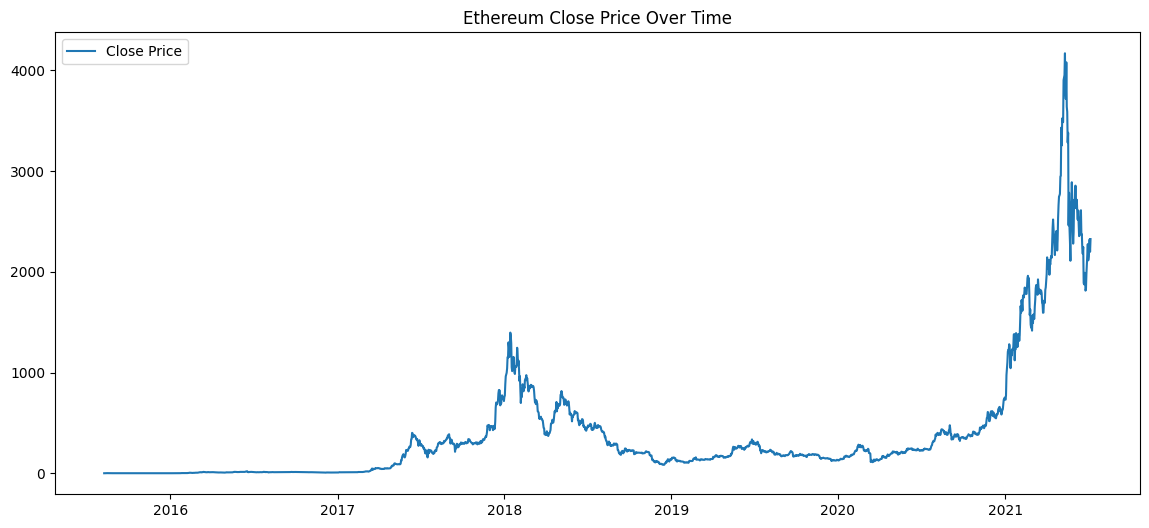

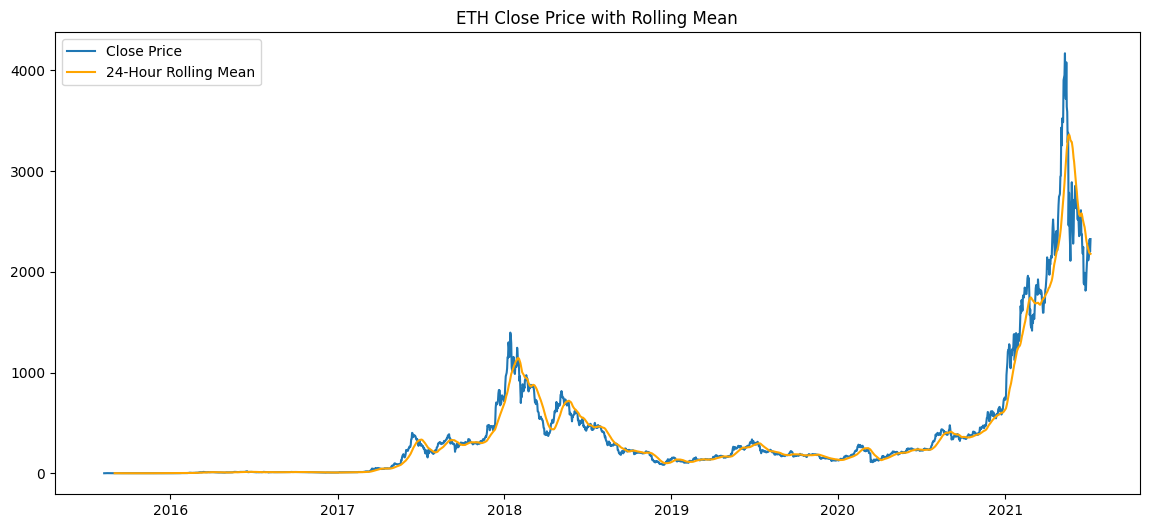

              Open         High          Low        Close        Volume
count  2160.000000  2160.000000  2160.000000  2160.000000  2.160000e+03
mean    382.879899   398.258568   365.592589   383.910691  7.057058e+09
std     599.719862   628.082281   566.611523   601.078766  1.064526e+10
min       0.431589     0.482988     0.420897     0.434829  1.021280e+05
25%      13.757600    14.265225    13.190950    13.819200  3.825102e+07
50%     198.425096   205.124631   193.302715   198.643691  2.148880e+09
75%     386.264935   396.494561   375.146804   386.435272  9.629136e+09
max    4174.635873  4362.350542  3785.848603  4168.701049  8.448291e+10


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line plot of closing price
plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Close Price')
plt.title('Ethereum Close Price Over Time')
plt.legend()
plt.show()

# Rolling average
df['Rolling_Mean'] = df['Close'].rolling(window=24).mean()

# Plot rolling average
plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['Rolling_Mean'], label='24-Hour Rolling Mean', color='orange')
plt.title('ETH Close Price with Rolling Mean')
plt.legend()
plt.show()

# Summary stats
print(df[['Open', 'High', 'Low', 'Close', 'Volume']].describe())


In [11]:
from statsmodels.tsa.stattools import adfuller

# ADF Test on raw data
result = adfuller(df['Close'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# If p > 0.05, apply differencing
df['Close_diff'] = df['Close'].diff().dropna()

# ADF Test on differenced data
result_diff = adfuller(df['Close_diff'].dropna())
print('ADF Statistic (Differenced):', result_diff[0])
print('p-value:', result_diff[1])


ADF Statistic: -0.026066281130864132
p-value: 0.9563225993836116
ADF Statistic (Differenced): -9.80660399747097
p-value: 5.803725004403697e-17


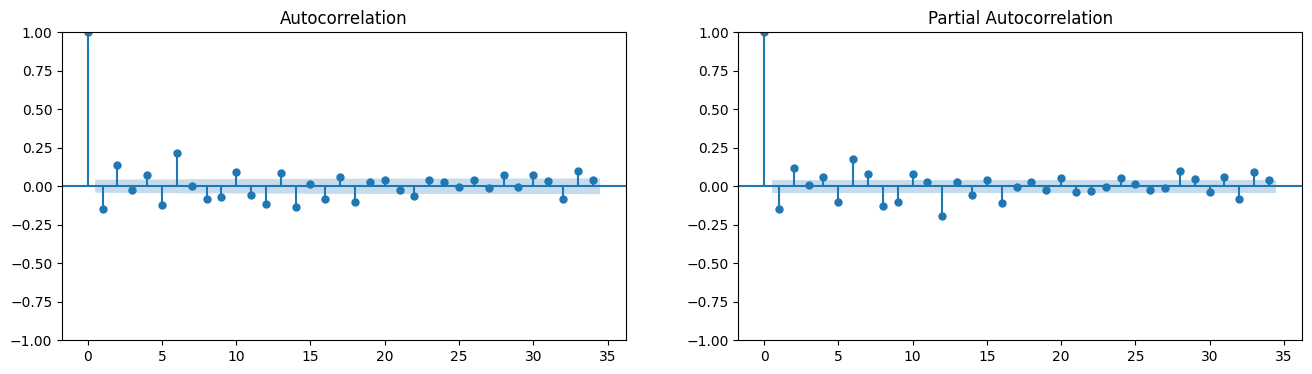

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2160
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -11403.342
Date:                Wed, 07 May 2025   AIC                          22812.683
Time:                        16:11:27   BIC                          22829.715
Sample:                    08-08-2015   HQIC                         22818.913
                         - 07-06-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8173      0.011    -71.792      0.000      -0.840      -0.795
ma.L1          0.6970      0.016     43.631      0.000       0.666       0.728
sigma2      2265.5468     12.336    183.651      0.0

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16,4))
plot_acf(df['Close_diff'].dropna(), ax=axes[0])
plot_pacf(df['Close_diff'].dropna(), ax=axes[1])
plt.show()

# Fit ARIMA model (example: ARIMA(5,1,2))
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['Close'], order=(1,1,1))
model_fit = model.fit()

# Summary
print(model_fit.summary())


In [19]:
# Align actual values with forecast range
actual = df['Close'].iloc[1000:len(df)]
predicted = df['forecast'].iloc[1000:len(df)]

# Calculate RMSE, MAPE
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
rmse = np.sqrt(mean_squared_error(actual, predicted))
mape = mean_absolute_percentage_error(actual, predicted)
print('RMSE:', rmse)
print('MAPE:', mape)


RMSE: 61.03251981045571
MAPE: 0.03475427845363794


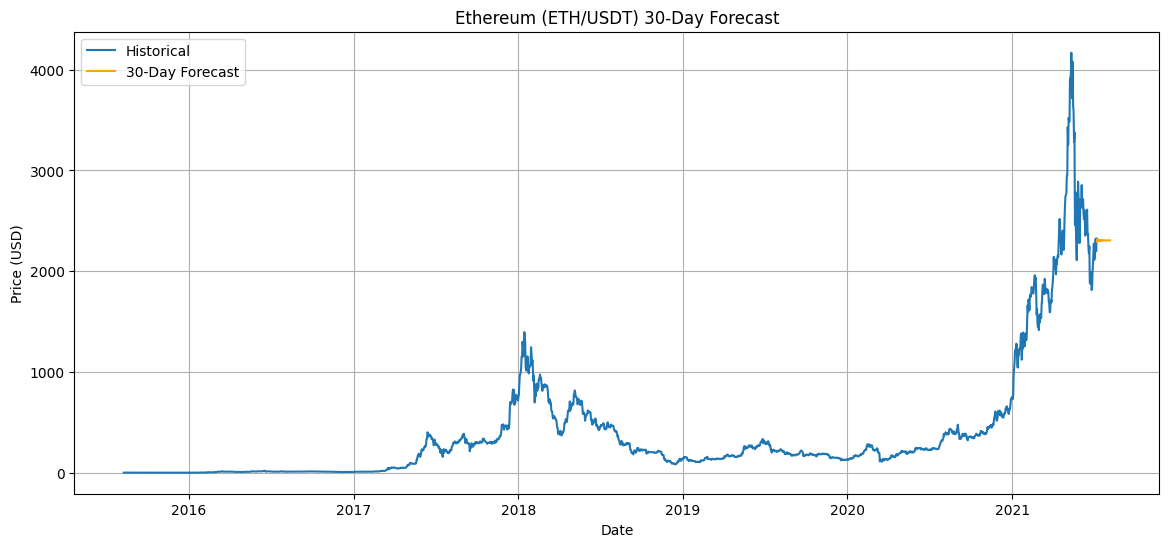

In [20]:
# Forecast the next 30 days
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)

# Plot
plt.figure(figsize=(14,6))
plt.plot(df['Close'], label='Historical')
plt.plot(pd.date_range(df.index[-1], periods=forecast_steps+1, freq='D')[1:],
         forecast, label='30-Day Forecast', color='orange')
plt.title('Ethereum (ETH/USDT) 30-Day Forecast')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()
